# The MNIST Dataset

Remember that you can connect this notebook to a Google drive using this piece of code:

```python
from google.colab import drive
drive.mount('/content/drive')
```

Then you can `import os` and use `os.listdir()`, `os.mkdir()` and `os.chdir()` to point the notebook to the directory you want ([tutorial](https://www.geeksforgeeks.org/os-module-python-examples/)).

---

## 1. Theory

Make sure you understand the second video of 3Blue1Brown's introduction to neural nets, and ask questions if there's anything unclear.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('IHZwWFHWa-w', width=853, height=480) # 3Blue1Brown 2

---

## 2. Hello world

Let's import TensorFlow.

In [1]:
import tensorflow as tf

Let's do some preprocessing first.

In [2]:
# MNIST

# load
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# preprocess
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels_one_hot = tf.keras.utils.to_categorical(train_labels)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels)

Our labels are now encoded as one-hot vectors (a one at the index of the correct class).

To see that, try and print out the label at the same index in `train_labels` and `train_labels_one_hot`.

In [5]:
print("Label as integer:", train_labels[0])
print("Label as one-hot vector:", train_labels_one_hot[0])

Label as integer: 5
Label as one-hot vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# build
model = tf.keras.models.Sequential()
model.add(tf.keras.Input((28 * 28,)))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

How does our 'raw' model perform on our test set?

Apply the network's `.evaluate()` method to `test_images` and `test_labels_one_hot`, collect the result into `test_loss` and `test_acc`, and see how well your network performs.

In [10]:
result = model.evaluate(test_images, test_labels_one_hot)
print(f"Loss: {result[0]}, accuracy: {result[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.0935 - loss: 2.4344
Loss: 2.43570613861084, accuracy: 0.09560000151395798


**Baseline note**: we have a dataset with the same number of samples per class, therefore our _common sense baseline_ is a random guess, $ \frac{1}{\text{n\_classes}} = \frac{1}{10} = 0.1$. Our randomly initialised dense yields an accuracy value roughly close to that.

Now we can train the model.

In [11]:
# train
model.fit(
    train_images,
    train_labels_one_hot,
    epochs=5,
    batch_size=128
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.6842 - loss: 1.1116
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9104 - loss: 0.3211
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9210 - loss: 0.2797
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.9258 - loss: 0.2580
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9294 - loss: 0.2484


Now apply the network's `.evaluate()` method again to `test_images` and `test_labels_one_hot`. Any change?

In [12]:
result = model.evaluate(test_images,test_labels_one_hot)
print(f"Loss: {result[0]}, accuracy: {result[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.9205 - loss: 0.2792
Loss: 0.24617807567119598, accuracy: 0.930400013923645


Our accuracy is $0.93\ (= 93\%)$, much higher than our baseline, that's good!

## 3. Research

- Add a text cell and comment on network training and test accuracy;
- Train for 20 epochs and evaluate. Comment on your findings;
- The first layer transforms the 784-element image vector to a 12-dimensional intermediate representation:  
  - Experiment with different intermediate dimensions (for instance: what is the smallest number of units needed to reach 100% accuracy in 5 epochs? In 20 epochs?); 
  - Make a markdown table of network performance on the test set for varying intermediate dimension. 
  - Comment on your results;
- Replace network compilation with:
  ```python
  model.compile(
      optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.0),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  ```
  
  The code is exactly equivalent, but we are now able to adjust learning rate and momentum. `learning_rate=0.001` is the default value: experiment with different learning rates. Tabulate your results and interpret.
- Experiment with different momentums. Tabulate and interpret.

### Two playgrounds to keep in mind

- [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.29184&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
- [Why Momentum Really Works](https://distill.pub/2017/momentum/)

### Experiments 1

- 20 epochs, varying units in the intermediate layer

In order to facilitate my experiments, I will write a wrapping function allowing me to rerun the code I need while changing the parameters I wish to examine (firs the intermediate dimensions, then the learning rate).

In [73]:
def run_experiment(units):
    # build
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input((28 * 28,)))
    model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )    
    # train
    model.fit(
        train_images,
        train_labels_one_hot,
        epochs=20,
        batch_size=128,
    )

A model with 12 units seems to be performing already quite well on the MNIST dataset. I am expecting to hit 100% accuracy relatively easily. I will therefore attempt to find the _smallest net_ that reaches 100% accuracy in 20 epochs of training.

In [74]:
run_experiment(units=4)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.4159 - loss: 1.7527
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.6890 - loss: 0.9727
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.7816 - loss: 0.7434
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.8160 - loss: 0.6533
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8292 - loss: 0.6005
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8383 - loss: 0.5673
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.8416 - loss: 0.5573
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8425 - loss: 0.5528
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8456 - loss: 0.5398
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8498 - loss: 0.5296
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8453 - loss: 0.5354
Epoch 12/20
469/469 ━━━━━━━━━━

Final results: accuracy: 0.8562 - loss: 0.4938.

In [75]:
run_experiment(units=8)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5680 - loss: 1.3847
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.8899 - loss: 0.4114
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.9074 - loss: 0.3382
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.9113 - loss: 0.3120
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.9164 - loss: 0.3019
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.9196 - loss: 0.2914
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9226 - loss: 0.2810
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9249 - loss: 0.2753
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.9254 - loss: 0.2685
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.9274 - loss: 0.2716
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.9267 - loss: 0.2659
Epoch 12/20
469/469 ━━━━━━━━━━

Final results: accuracy: 0.9338 - loss: 0.2387

In [76]:
run_experiment(units=10)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.6599 - loss: 1.1691
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9030 - loss: 0.3460
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.9188 - loss: 0.2869
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9223 - loss: 0.2786
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9275 - loss: 0.2606
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.9305 - loss: 0.2485
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.9329 - loss: 0.2408
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9329 - loss: 0.2406
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9354 - loss: 0.2278
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.9368 - loss: 0.2299
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.9373 - loss: 0.2282
Epoch 12/20
469/469 ━━━━━━━━━━

Final results: accuracy: 0.9434 - loss: 0.2035

In [77]:
run_experiment(units=12)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.6654 - loss: 1.1565
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8994 - loss: 0.3545
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.9194 - loss: 0.2867
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.9269 - loss: 0.2545
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9316 - loss: 0.2381
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.9349 - loss: 0.2270
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9405 - loss: 0.2099
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9413 - loss: 0.2086
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9445 - loss: 0.1966
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9484 - loss: 0.1874
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9468 - loss: 0.1867
Epoch 12/20
469/469 ━━━━━━━━━━

Final results: accuracy: 0.9551 - loss: 0.1576

In [78]:
run_experiment(units=16)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.7251 - loss: 1.0180
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.9052 - loss: 0.3258
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.9198 - loss: 0.2872
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.9274 - loss: 0.2520
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.9312 - loss: 0.2424
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9363 - loss: 0.2258
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9382 - loss: 0.2161
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.9407 - loss: 0.2072
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.9419 - loss: 0.2005
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9450 - loss: 0.1922
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9463 - loss: 0.1884
Epoch 12/20
469/469 ━━━━━━━━━━

Final results: accuracy: 0.9549 - loss: 0.1597

In [79]:
run_experiment(units=20)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.7718 - loss: 0.8628
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9143 - loss: 0.2993
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9286 - loss: 0.2525
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9366 - loss: 0.2260
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.9397 - loss: 0.2143
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9449 - loss: 0.1981
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9473 - loss: 0.1852
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9516 - loss: 0.1689
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.9545 - loss: 0.1610
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9567 - loss: 0.1534
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.9577 - loss: 0.1451
Epoch 12/20
469/469 ━━━━━━━━━━

Final results: accuracy: 0.9667 - loss: 0.1156

**Preliminary conclusion**

Remarkably, I was expecting to hit 100% accuracy earlier, when increasing the number of units linearly.

Here is a table with my results for the above experiments (highest accuracy in bold):

| units | accuracy | loss |
|--- | --- | --- |
| 4 | 0.8562 | 0.4938 |
| 8 | 0.9338 | 0.2387 |
| 10 | 0.9434 | 0.2035 |
| 12 | 0.9551 | 0.1576 |
| 16 | 0.9549 | 0.1597 |
| 20 | **0.9667** | 0.1156 |

It seems the case that so far the accuracy steadily increases, in tandem with the number of units in my intermediate layer. I also notice that despite a steep rise in accuracy values at the beginning of training, my runs seem to plateau relatively fast, after only a few epochs.

### Experiments 2

- finding the smallest number of units reaching 100% accuracy during training

I will now try another method: first, attempt to _overshoot_, with a value that I'm expecting will yield 100%, and then manually perform a binary search downward, picking the middle value for my number of units.

In [80]:
run_experiment(512)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8746 - loss: 0.4430
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9653 - loss: 0.1157
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9783 - loss: 0.0708
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9849 - loss: 0.0509
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9892 - loss: 0.0364
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9926 - loss: 0.0274
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9946 - loss: 0.0205
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9960 - loss: 0.0155
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9973 - loss: 0.0113
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9974 - loss: 0.0103
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9986 - loss: 0.0063
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Ok! $512$ units _does_ reach 100% accuracy, at epoch 18 in this case. Let's search down.

In [81]:
run_experiment(256)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.8681 - loss: 0.4722
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.9584 - loss: 0.1456
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.9740 - loss: 0.0925
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9810 - loss: 0.0650
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.9850 - loss: 0.0521
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.9891 - loss: 0.0382
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.9913 - loss: 0.0320
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.9924 - loss: 0.0276
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.9943 - loss: 0.0204
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.9960 - loss: 0.0158
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9970 - loss: 0.0121
Epoch 12/20
469/469 ━━━━━━━━━━

We do not hit 100% accuracy in this run, but almost! Let's search upward.

In [82]:
256 + (256//2) # mid-point above

384

In [83]:
run_experiment(384)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8702 - loss: 0.4563
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9632 - loss: 0.1268
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.0773
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9843 - loss: 0.0553
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9886 - loss: 0.0405
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9899 - loss: 0.0325
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9932 - loss: 0.0238
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9952 - loss: 0.0181
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9963 - loss: 0.0141
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9971 - loss: 0.0115
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9981 - loss: 0.0085
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

100% accuracy hit at epoch 18! Let's move down.

In [84]:
384 - (384 - 256)//2 # mid-point down

320

In [86]:
run_experiment(320)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8677 - loss: 0.4727
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.9615 - loss: 0.1360
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9758 - loss: 0.0840
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9821 - loss: 0.0614
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.9879 - loss: 0.0429
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9900 - loss: 0.0348
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9924 - loss: 0.0277
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9937 - loss: 0.0228
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.9952 - loss: 0.0184
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.9969 - loss: 0.0130
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.9974 - loss: 0.0110
Epoch 12/20
469/469 ━━━━━━━━━━━━━━

Hitting 100% accuracy at epoch 20, with one layer and `320` units. Here's the summary for this experiment (lowest-unit model in bold):

| units | epoch with 100% acc|
| --- | --- |
|256 | none|
| **320** | 20 |
| 384 | 18|
| 512 | 18 |


I note that even if I could reach 100% accuracy in 20 epochs with only `320` units, I did not exhaust the search. Also, different runs of this experiment yield slightly different results: I would need to create a system that automates this search to the end, and performs it several times, in order to reach a firmer conclusion.

Let me outline how I could expand this further:
- I could keep on searching in the values between `256` and `320` until I find the lowest point;
- I could implement the binary search instead of doing it manually;
- I could perhaps search for larger number of units, and more layers, but training only until 5 epochs, so that it saves some time and compute. 

### Experiments 3

- 20 epochs, varying the learning rate

This time, I will use the same experimental set-up to see if, given a fixed model, I can find the best learning rate. I will approach the problem using **grid search**, by setting up a range of equally spaced possible values for it, try a run on all of those with all other hyperparameters fixed.

Since my initial experiments showed that the best accuracy I obtained was with `512` units, I will choose this as the number of units for this experiment.

I found [on the documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop) that the default learning rate for `tf.keras.optimizers.RMSprop` is `0.001`, so I will keep that as the central value.

In [90]:
def run_lr_experiment(learning_rate):
    # build
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input((28 * 28,)))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate, momentum=0.0),
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )    
    # train
    model.fit(
        train_images,
        train_labels_one_hot,
        epochs=20,
        batch_size=128,
    )

Again, to help keep my experiments clean and compact, I will perform them in a loop:

In [ ]:
all_learning_rates = [0.0001, 0.0005, 0.001, 0.0015, 0.002]

In [95]:
for i, lr in enumerate(all_learning_rates):
    print(f"Experiment {i+1} (learning rate: {lr}):")
    print()
    run_lr_experiment(lr)
    print()
    print("--------------------------------------------------------------------------")
    print()

Experiment 1 (learning rate: 0.0001):

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7491 - loss: 1.0822
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9155 - loss: 0.3103
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9319 - loss: 0.2489
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9428 - loss: 0.2117
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9486 - loss: 0.1851
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9553 - loss: 0.1595
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9601 - loss: 0.1454
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9649 - loss: 0.1313
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9670 - loss: 0.1227
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9689 - loss: 0.1131
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9730 - loss: 0.1043
Epoch 12/20
4

Here is a summary of the above experiment, extracting the last (which are in this case also the best) values:

| lr | accuracy | loss | epoch reaching 100% acc |
| --- | --- | --- | --- |
| 0.0001 | 0.9849 | 0.0587 | none |
| 0.0005 | 0.9998 | 0.0030 | none |
| 0.001 | 1.0000 | 3.2228e-04 | 16 |
| 0.0015 | 1.0000 | 1.1633e-04 | 14 |
| 0.002 | 1.0000 | 5.9884e-05 | 14 |

The two learning rate values `0.0015` and `0.002` hit 100% accuracy the earliest. It might be possible to hit the 100% accuracy earlier with an even larger learning rate, but for now, it is possible to distinguish between those two using the loss value. In which case, the value of `0.002` comes out on top, with `5.9884e-05` being the lowest. We will use this and proceed experimenting with various momentum values.

### Experiments 4

- 20 epochs, Varying the momentum

In [97]:
def run_mom_experiment(momentum):
    # build
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input((28 * 28,)))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.002, momentum=momentum),
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )    
    # train
    model.fit(
        train_images,
        train_labels_one_hot,
        epochs=20,
        batch_size=128,
    )

We will continue with grid search, testing three momentum values to start with.

In [103]:
all_momentum_values = [0.7, 0.8, 0.9]

In [104]:
for i, mom in enumerate(all_momentum_values):
    print(f"Experiment {i+1} (momentum: {mom}):")
    print()
    run_lr_experiment(mom)
    print()
    print("--------------------------------------------------------------------------")
    print()

Experiment 1 (momentum: 0.7):

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3693 - loss: 884.0505
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1578 - loss: 2.3881
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1806 - loss: 2.4861
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1738 - loss: 2.3563
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1937 - loss: 2.3201
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2268 - loss: 2.2104
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2517 - loss: 2.2074
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2501 - loss: 2.4447
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2380 - loss: 2.1835
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2627 - loss: 2.1189
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2645 - loss: 2.2060
Epoch 12/20
469/469

Here are the results of the above experiments:

| momentum | accuracy | loss | epoch | 
| --- | --- | --- | --- |
| 0.7 | 0.2980 | 2.0699 | 18 |
| 0.8 | 0.2939 | 2.0141 | 19 |
|  0.9 | 0.2309 | 2.1235 | 17 |

We can note a very strange behaviour in the first epoch of each experiment, yielding the best accuracy of the run before going down and increasing in a stable way, but at a much lower level. The value for the loss in the first epoch is also very large. For those two reasons, they were not selected in the table above when measuring performance.

| momentum | accuracy | loss |
| --- | --- | --- |
| 0.7 | 0.3693 | 884.0505 |
| 0.8 | 0.3545 | 1703.1272 |
|  0.9 | 0.4017 | 1810.3062 |

Remarkably, high momentum values for the `RMSprop` optimizer seem to performs much worse than the default (which is zero)!

Just as a sanity check, we can check with low values and zero, to see if it is possible to achieve a higher performance than the default.

In [105]:
all_momentum_values = [0., 0.05, 0.1, 0.15]

In [107]:
for i, mom in enumerate(all_momentum_values):
    print(f"Experiment {i+1} (momentum: {mom}):")
    print()
    run_lr_experiment(mom)
    print()
    print("--------------------------------------------------------------------------")
    print()

Experiment 1 (momentum: 0.0):

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0917 - loss: 2.3291
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0912 - loss: 2.3282
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0911 - loss: 2.3305
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0907 - loss: 2.3289
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0916 - loss: 2.3276
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0912 - loss: 2.3291
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0914 - loss: 2.3289
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0905 - loss: 2.3304
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0894 - loss: 2.3309
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0910 - loss: 2.3271
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0923 - loss: 2.3262
Epoch 12/20
469/469 ━

Here are the results for the above experiments:

| momentum | accuracy | loss | epoch | 
| --- | --- | --- | --- |
| 0.0 | 0.0931 | loss: 2.3294 | 15 |
| 0.05 | **0.9732** | 0.1519  | 20 |
| 0.1 | 0.9340   | 0.3487 | 16 |
| 0.15 | 0.8824 | 0.5574 |  18 |

It is possible to note an expected behaviour in the first run, with momentum `0.0`: the loss and accuracy values are stagnating, as if no learning was in fact happening?! It is something that would be worth looking into, since we haven't seen such behaviour in other runs, even if `0.0` is actually used as the default.

Otherwise, it is possible to conclude that a momentum of `0.05` is the best value of this set, yielding a maximum accuracy of `0.9732`.

It is quite surprising to note that even if we used the same learning rate as our best run above, tweaking the momentum value did not yield 100% accuracy before the 20th epoch as previously.

The values for accuracy and loss seem to improve overall, but it is not a straightforward progression as in the first experiments: that means it takes a while to search for the highest values in the list, and can lead to errors. It would be good to be able to automate the process. 

---

## 4. Extra: use your model

Can you select an image from the training set, display it using `plt.imshow()` (you need to do `import matplotlib as plt` before that)?

Can you then use the same image (don't forget it should be of shape [1, 784], the 1 being the batch size), pass it to `model.predict()`, collect the predictions, and find which class was predicted using the `.argmax()` method? Note again the shape of the prediction tensor: it contains a batch dimension at the front!

Try with different images, or even take a picture of a number you've drawn, open it in Python, resize it to 28x28 (using pillow for instance), and try the network on it!.

### Testing on training set images

In [108]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input((28 * 28,)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.002),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)    
# train
model.fit(
    train_images,
    train_labels_one_hot,
    epochs=20,
    batch_size=128,
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8786 - loss: 0.3986
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9724 - loss: 0.0900
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9834 - loss: 0.0539
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9886 - loss: 0.0360
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9916 - loss: 0.0247
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9938 - loss: 0.0199
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9954 - loss: 0.0145
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9967 - loss: 0.0109
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9971 - loss: 0.0085
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9982 - loss: 0.0062
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9989 - loss: 0.0035
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [114]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [110]:
train_images[3].shape

(784,)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
The model prediction for this image is: 1


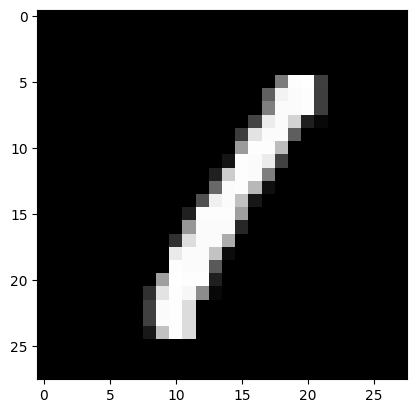

In [164]:
plt.imshow(train_images[3].reshape((28,28)), cmap="gray")
probs = model.predict(train_images[3:4]) # that way, I keep the batch dimension
pred = np.argmax(probs)
print(f"The model prediction for this image is: {pred}")

The model predicted this one correctly!

### Testing on manually drawn images

(216, 234)


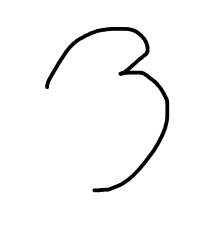

In [180]:
img = Image.open("tests/3.png")
print(img.size)
img

I will need to invert the colours, in order to be more similar to the dataset!

In [181]:
img_resized = img.resize((28, 28))
img_resized.size

(28, 28)

In [182]:
img_arr = 1 - np.array(img_resized).astype("float32")
img_arr.shape # our image has four channels, we only want one!

(28, 28, 4)

In [193]:
# taking the mean across all channels
# -> shape (28, 28), then reshaping
# casting to float32, and rescaling to numbers from 0 to 1
img_flat = img_arr.mean(axis=-1).reshape((1, 28*28)).astype("float32") / 255

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Probabilities: [[3.9300800e-38 9.9951577e-01 0.0000000e+00 0.0000000e+00 1.7106959e-14
  4.5718349e-04 1.0389939e-17 2.7079050e-05 0.0000000e+00 1.8516357e-16]]
The model prediction for this image is: 1


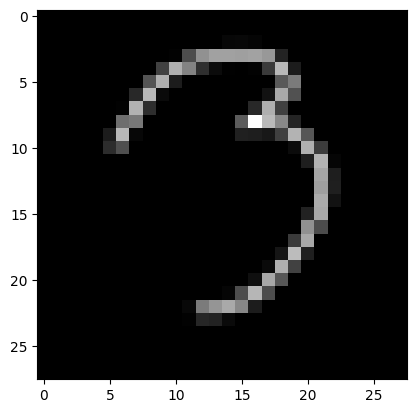

In [195]:
plt.imshow(img_flat.reshape((28,28)), cmap="gray")
probs = model.predict(img_flat) # that way, I keep the batch dimension
pred = np.argmax(probs)
print("Probabilities:", probs)
print(f"The model prediction for this image is: {pred}")

This one failed!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Probabilities: [[1.77327567e-03 8.02445337e-02 6.89289570e-01 1.01669036e-01
  2.99483701e-03 5.12384297e-03 2.51960475e-03 6.68142214e-02
  4.88877855e-02 6.83364400e-04]]
The model prediction for this image is: 2


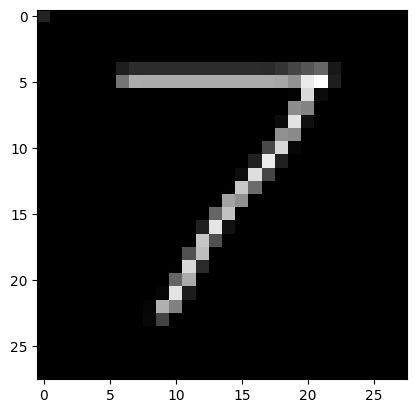

In [197]:
img = Image.open("tests/7.png")
img = 1 - np.array(img.resize((28, 28))).astype("float32").mean(axis=-1).reshape((1, 28*28)) / 255
plt.imshow(img.reshape((28,28)), cmap="gray")
probs = model.predict(img) # that way, I keep the batch dimension
pred = np.argmax(probs)
print("Probabilities:", probs)
print(f"The model prediction for this image is: {pred}")

Fail again!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Probabilities: [[0.00668765 0.00070152 0.05863287 0.15659164 0.00103417 0.04155923
  0.02252625 0.0179642  0.688285   0.00601748]]
The model prediction for this image is: 8


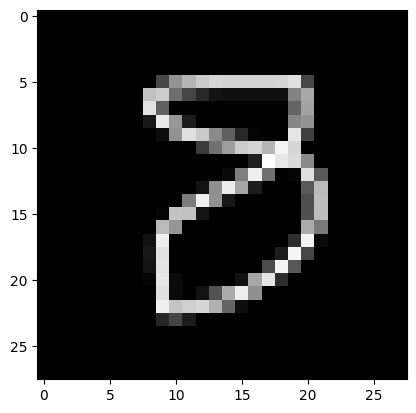

In [198]:
img = Image.open("tests/8.png")
img = 1 - np.array(img.resize((28, 28))).mean(axis=-1).reshape((1, 28*28)) / 255
plt.imshow(img.reshape((28,28)), cmap="gray")
probs = model.predict(img) # that way, I keep the batch dimension
pred = np.argmax(probs)
print("Probabilities:", probs)
print(f"The model prediction for this image is: {pred}")

Phew! This one succeeded.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Probabilities: [[6.92608118e-01 2.28205114e-03 1.16214484e-01 3.37083451e-02
  1.72007582e-04 6.48065880e-02 3.65178275e-04 1.89519245e-02
  8.73681530e-03 6.21543936e-02]]
The model prediction for this image is: 0


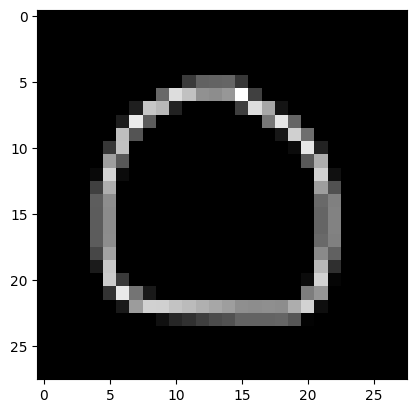

In [199]:
img = Image.open("tests/0.png")
img = 1 - np.array(img.resize((28, 28))).astype("float32").mean(axis=-1).reshape((1, 28*28)) / 255
plt.imshow(img.reshape((28,28)), cmap="gray")
probs = model.predict(img) # that way, I keep the batch dimension
pred = np.argmax(probs)
print("Probabilities:", probs)
print(f"The model prediction for this image is: {pred}")

This one worked as well, yay!

---

## 5. Saving/Reloading

You can save and reload your model like so:

```python
model.save("dense.mnist.keras")
network_reloaded = tf.keras.models.load_model("dense.mnist.keras")
```

In [200]:
model.save("dense.mnist.keras")

In [201]:
network_reloaded = tf.keras.models.load_model("dense.mnist.keras")

It is possible to call `fit()` on the loaded model and continue training.

```python
network_reloaded.fit(train_images, train_labels_one_hot, epochs=5, batch_size=128)
```

In [202]:
network_reloaded.fit(train_images, train_labels_one_hot, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.0322e-05
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.7214e-05
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.2838e-05
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.2344e-05
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.0662e-05


Completely overkill in this case, but the reloading and further training works!

---

## Reminder

Check out the numerical dojo if you haven't done so:
- #### [`1.first-steps-tensorflow.ipynb`](https://github.com/jchwenger/AI/blob/main/labs/1-lab/1.first-steps-tensorflow.ipynb)
- #### [`1.first-steps-tensorflow.QUIZ.ipynb`](https://github.com/jchwenger/AI/blob/main/labs/1-lab/1.first-steps-tensorflow.QUIZ.ipynb)